# Book Rating Prediction Model 

## Project Summary:

### “There is no friend as loyal as a book.” - Ernest Hemingway
Nowadays with so many books available, it can be hard to select the best ones to read. The
dataset provided is a curation of Goodreads books based on real user information. It can be
used for many tasks like predicting a book’s rating or recommending new books.
Below is the information you have regarding the dataset attributes:
1) bookID: A unique identification number for each book.

2) title: The name under which the book was published.

3) authors: The names of the authors of the book. Multiple authors are delimited by “/”.

4) average_rating: The average rating of the book received in total.

5) isbn: Another unique number to identify the book, known as the International Standard Book Number.

6) isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

7) language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.

8) num_pages: The number of pages the book contains.

9) ratings_count: The total number of ratings the book received.


10) text_reviews_count: The total number of written text reviews the book received.

11) publication_date: The date the book was published.

12) publisher: The name of the book publisher.

## PIPELINE

### 1 - Installing Pacakeges and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import seaborn as sns

### 2 - Data Extraction 

In [2]:
df = pd.read_csv ("C:/Users/pinki/OneDrive/Documentos/DSTI/ML Project/books.csv", sep = ",", index_col = "bookID")

ParserError: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13


#### Find an error reading the file, so ask to skip those lines.

In [3]:
df = pd.read_csv('C:/Users/pinki/OneDrive/Documentos/DSTI/ML Project/books.csv', on_bad_lines='skip')
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


### 3 - Data Wrangling (checking and cleaning data)

#### Filtering columns not related to the project: isbn, isbn13, language_code, publication_date and bookID.

In [4]:
df = df.drop(columns = ['bookID', 'isbn', 'isbn13', 'language_code', 'publication_date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3     num_pages         11123 non-null  int64  
 4   ratings_count       11123 non-null  int64  
 5   text_reviews_count  11123 non-null  int64  
 6   publisher           11123 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 608.4+ KB


#### Checking for null values and data type.

In [6]:
df = df.rename(columns={'  num_pages': 'num_pages'})

In [7]:
df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000
mean,3.934075,336.405556,1.794285e+04,542.048099
std,0.350485,241.152626,1.124992e+05,2576.619589
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,47.000000
75%,4.140000,416.000000,5.000500e+03,238.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


#### Check of the 10 first and ast rows to explore the dataset.

In [8]:
df.head(10)

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,Scholastic
5,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,152,19,1,Nimble Books
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,3342,28242,808,Scholastic
7,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,815,3628,254,Gramercy Books
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,815,249558,4080,Del Rey Books
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,215,4930,460,Crown


In [9]:
df.tail(10)

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publisher
11113,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,160,207,16,Editorial Presença
11114,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,147,396,37,Editorial Presença
11115,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,176,161,14,Editorial Presença
11116,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,160,215,11,Editorial Presença
11117,Whores for Gloria,William T. Vollmann,3.69,160,932,111,Penguin Books
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,512,156,20,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,4.08,635,783,56,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,415,820,95,Penguin Books
11121,Poor People,William T. Vollmann,3.72,434,769,139,Ecco
11122,Las aventuras de Tom Sawyer,Mark Twain,3.91,272,113,12,Edimat Libros


### a- Numerical features:
#### The idea is to visualize numerical features and their distributions with histograms and boxplots. To find outliers and illogical values.

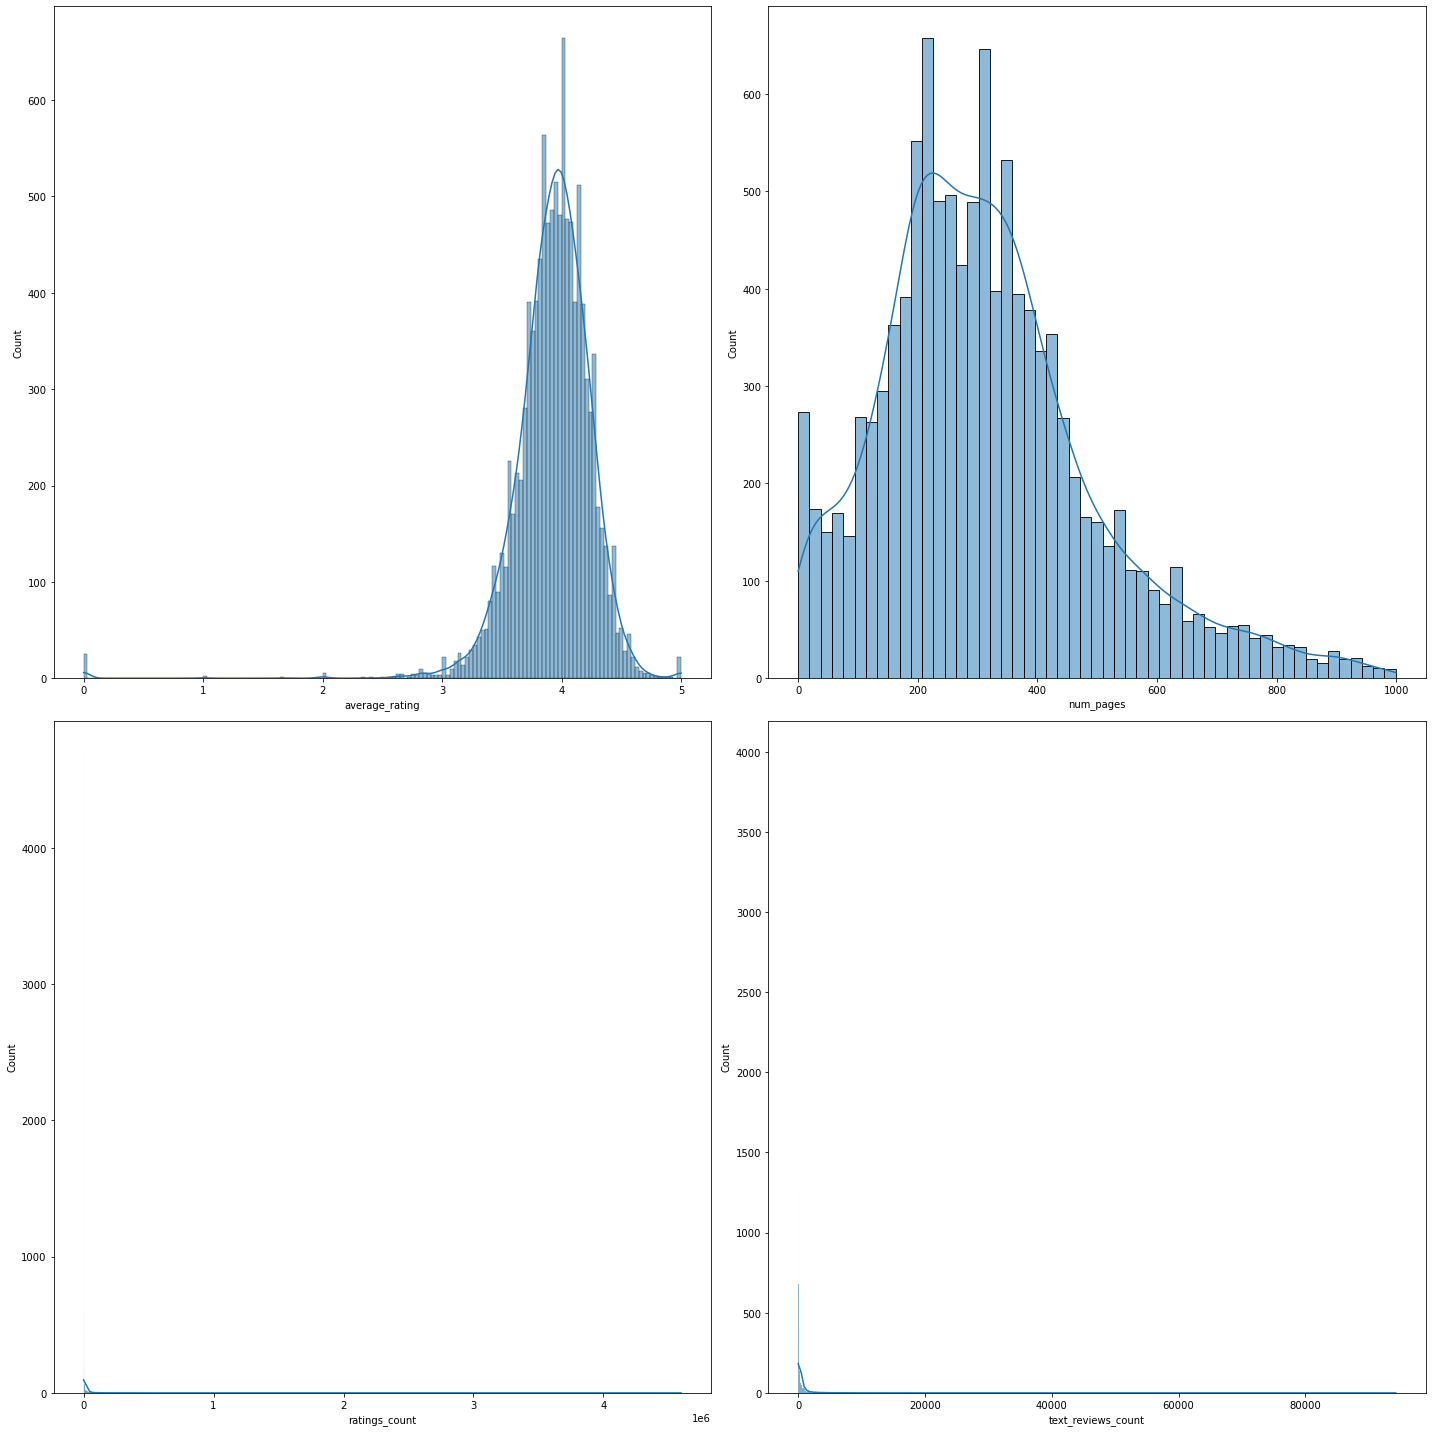

In [20]:
cols = ['average_rating','num_pages','ratings_count','text_reviews_count']
fig, axes = plt.subplots(2, 2,figsize=(20,20))
axes = axes.ravel() 

for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax=ax)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'text_reviews_count')

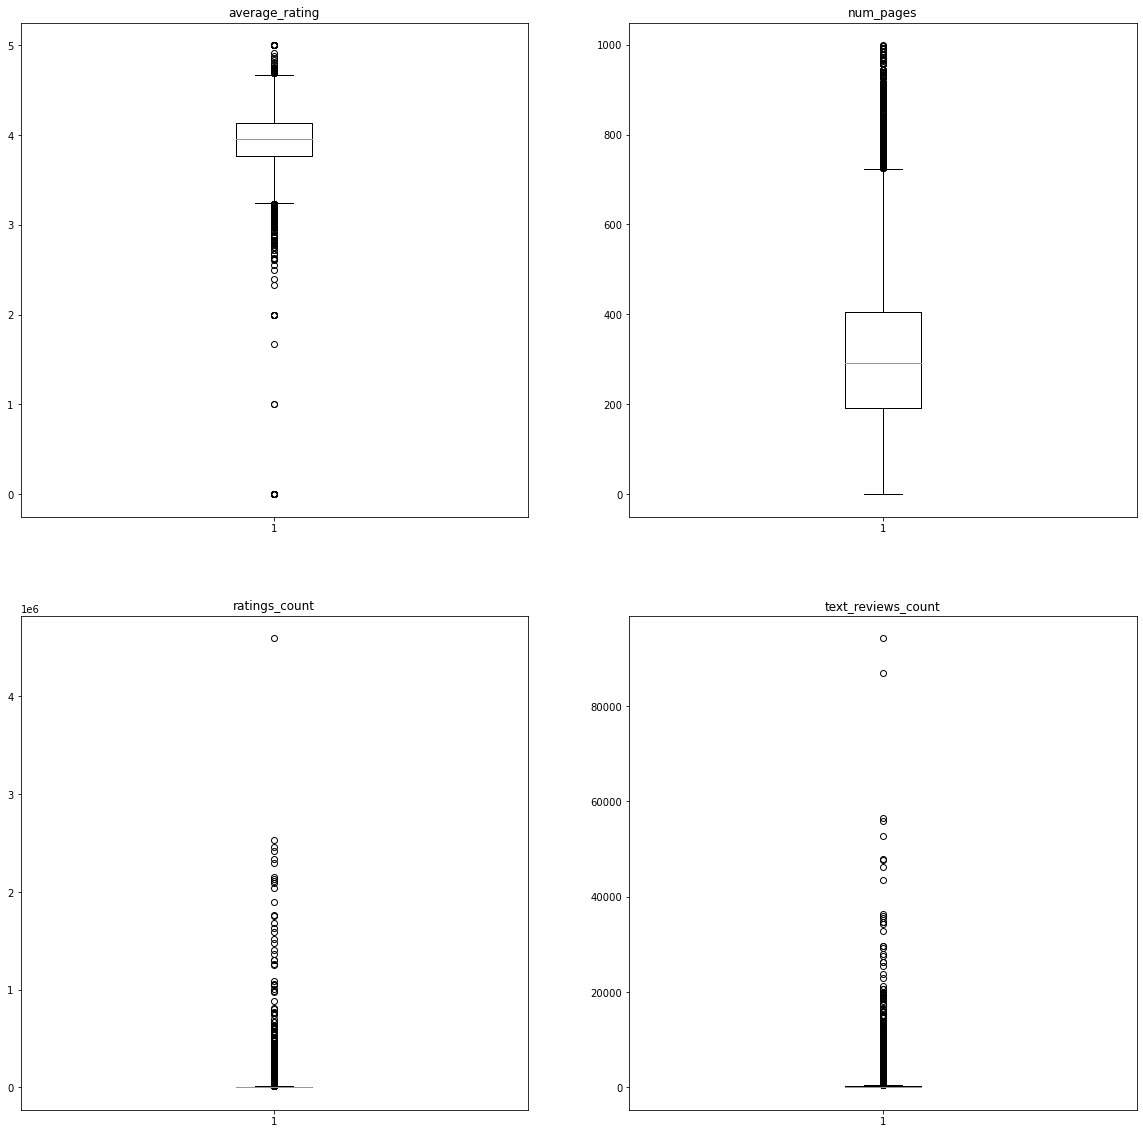

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
axs[0, 0].boxplot(df[['average_rating']])
axs[0, 0].set_title('average_rating')
axs[0, 1].boxplot(df[['num_pages']])
axs[0, 1].set_title('num_pages')
axs[1, 0].boxplot(df[['ratings_count']])
axs[1, 0].set_title('ratings_count')
axs[1, 1].boxplot(df[['text_reviews_count']])
axs[1, 1].set_title('text_reviews_count')

##### -num_pages:  
###### based on the data visualization, all the books with more pages than 1000 are going to be removed from the data frame (217).

In [12]:
df.loc[df.num_pages>1000,:]

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publisher
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,Scholastic
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,3342,28242,808,Scholastic
21,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,1728,101233,1550,Ballantine Books
22,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,1184,1710,91,Houghton Mifflin Harcourt
24,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee,4.50,1216,1618,140,Houghton Mifflin Harcourt
...,...,...,...,...,...,...,...
10535,Whirlwind (Asian Saga #6),James Clavell,3.82,1231,5626,164,Morrow
10543,War and Remembrance (The Henry Family #2),Herman Wouk,4.41,1042,29555,680,Back Bay Books
10749,The Sword of Truth Boxed Set I: Wizard's Firs...,Terry Goodkind,4.29,2480,4196,81,Tor Books
10906,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,3400,6,1,Chatto & Windus


In [13]:
df = df.drop(index=df.loc[df.num_pages>1000,:].index)

##### average_rating:

###### round average ratings and change data type from float to integer values

In [14]:
df['rounded_average_rating'] = df['average_rating'].round(decimals=0).astype(int)
set(df.rounded_average_rating)

{0, 1, 2, 3, 4, 5}

##### ratings_count:

###### first, select all the rows equal to 0, because could lead to an error in judgement (I don't know if no one rated them before or their actual rate is 0).

In [22]:
df.loc[df.ratings_count==0,:]

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publisher,rounded_average_rating
264,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,480,0,0,Geoplaneta,4
265,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.00,295,0,0,Lonely Planet,0
375,Juiced Official Strategy Guide,Doug Walsh,0.00,112,0,0,BradyGames,0
525,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,664,0,0,Longman Publishing Group,3
526,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,854,0,0,Longman Publishing Group,4
...,...,...,...,...,...,...,...,...
10513,Mission Possible,Kenneth H. Blanchard,3.44,242,0,0,McGraw-Hill Companies,3
10849,A Cargo of Women: Susannah Watson and the Conv...,Babette Smith,3.58,264,0,0,Rosenberg Publishing,4
10862,Courageous Faith Through the Year,Bill Hybels/Keri Wyatt Kent,3.50,327,0,0,IVP Books,4
10917,The Leadership Challenge: Skills for Taking Ch...,Warren G. Bennis,0.00,60,0,0,AMR/Advanced Management Reports,0


In [23]:
df = df.drop(index=df.loc[df.ratings_count==0,:].index)

###### Based on the histogram and the bloxplot, values over 500K were unsual and for the quatity of items involved, not relevant for the model.

In [24]:
df.loc[df.ratings_count>500000,:]

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publisher,rounded_average_rating
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,Scholastic Inc.,5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,Scholastic Inc.,4
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,Scholastic Inc.,5
23,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,398,2128944,13670,Houghton Mifflin Harcourt,4
284,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,197,1631221,55843,HarperCollins,4
...,...,...,...,...,...,...,...,...
9433,The Secret Life of Bees,Sue Monk Kidd,4.05,302,1044725,26279,Penguin Books,4
9697,Holes (Holes #1),Louis Sachar,3.96,233,887554,17547,Scholastic,4
9920,Matilda,Roald Dahl/Quentin Blake,4.31,240,541914,11576,Puffin Books,4
10336,Twilight (Twilight #1),Stephenie Meyer,3.59,501,4597666,94265,Little Brown and Company,4


In [25]:
df = df.drop(index=df.loc[df.ratings_count>500000,:].index)

### b- Categorical Features

##### basic descriptive statistics to get an overview of the categorical features.

In [26]:
df.select_dtypes(include='object').describe()

,title,authors,publisher
count,10761,10761,10761
unique,10063,6450,2227
top,The Iliad,P.G. Wodehouse,Vintage
freq,9,40,314


##### autors:
###### contains multiple authors, the idea is to keep only the first one.

In [27]:
df["totalNumOfAuthors"]=df["authors"].str.count('/').add(1)

In [28]:
df[["authors","author2"]]=df["authors"].str.split("/",n=1,expand=True)

In [29]:
df.author2.isna().sum()

6386

###### authors:   here I kept only the name of the first author.
###### author2:   here I put the names of the rest of the authors, that are not relevant for this project. It is posible to drop this column.

In [30]:
df.drop("author2",axis=1,inplace=True)
df.shape

(10761, 9)

### TOP 10 Authors, who wrote most books.

Text(0.5, 1.0, 'Top 10 Authors with most number of books')

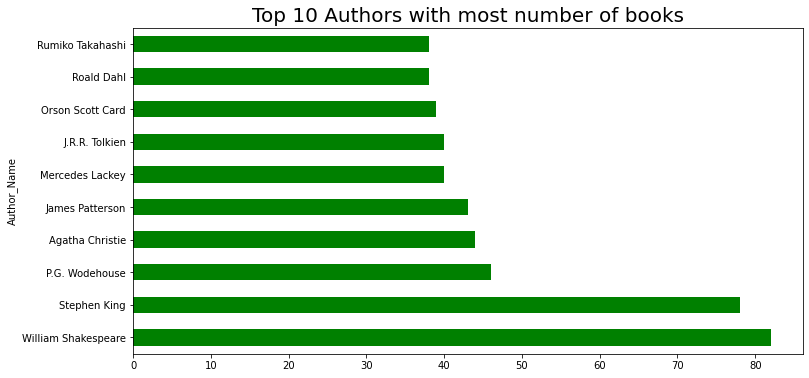

In [31]:
plt.figure(figsize = (12, 6))
df.authors.value_counts().head(10).plot(kind="barh",color="g",)
plt.ylabel('Author_Name')
plt.title("Top 10 Authors with most number of books",fontsize=20)

#### The writers who wrote the most number of books in the data set are: William Shakespeare and Stephen King with aproximately 80 books each one. On the other extreme, Rumiko Takahashi and Roald Dahl with 39 books each.

### TOP 10 rated Authors

In [32]:
pd.DataFrame(df.groupby(['authors'])['average_rating'].mean().head(10)).sort_values(by=['average_rating'],ascending=False)

,average_rating
authors,
A.E. Cunningham,4.150
Abigail Adams,4.140
Abdul Rahman Munif,4.130
Abbie Hoffman,3.960
A.S. Byatt,3.770
A.D.P. Briggs,3.760
A.J. Jacobs,3.760
A.N. Roquelaure,3.735
A.B. Yehoshua,3.600


### TOP 10 rated books

In [33]:
pd.DataFrame(df.groupby(['title'])['average_rating'].mean().head(10)).sort_values(by=['average_rating'],ascending=False)

,average_rating
title,
100 Years of Lynchings,4.61000
100 Love Sonnets,4.39000
1000 Rings: Inspiring Adornments for the Hand,4.23000
said the shotgun to the head.,4.22000
'Salem's Lot,4.04875
100 Great Fantasy Short Short Stories,3.91000
10 lb Penalty,3.90000
1 000 Places to See Before You Die,3.85000
1000 Record Covers,3.85000


### TOP 10 best rated Publishers

In [34]:
pd.DataFrame(df.groupby(['publisher'])['average_rating'].mean().head(10)).sort_values(by=['average_rating'],ascending=False)

,average_rating
publisher,
A K PETERS,4.500
AA World Services,4.450
A & C Black (Childrens books),4.400
1st World Library,4.180
A Harvest Book/Harcourt Inc.,4.070
ADV Manga,4.038
AHA! Process,3.900
10/18,3.650
1st Book Library,3.580


### TOP 10 Publishers which has the most numeber of books published

Text(0.5, 1.0, 'Top 10 Publishing Houses with most number of books')

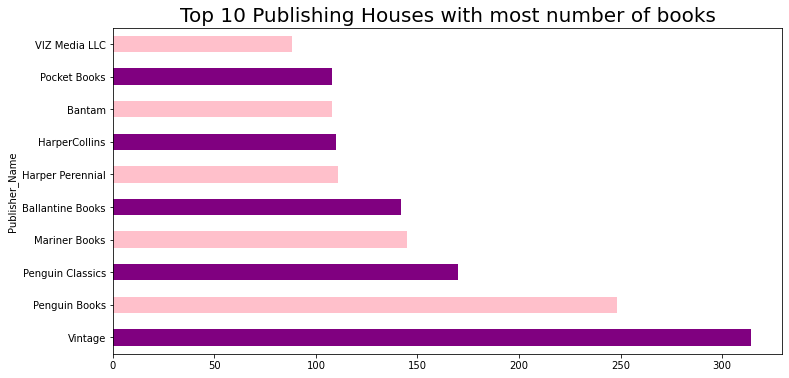

In [35]:
plt.figure(figsize = (12, 6))
df.publisher.value_counts().head(10).plot(kind="barh",color=['purple', 'pink'])
plt.ylabel('Publisher_Name')
plt.title("Top 10 Publishing Houses with most number of books",fontsize=20)

### Publishers with books rated below 3

In [36]:
df.loc[df.average_rating<3,'publisher'].tail(100).describe()

count          55
unique         51
top       Vintage
freq            3
Name: publisher, dtype: object

##### There are 51 unique values from 55, it is possible to conclude that some publishers need to improve their selection of books, because they are usually get lower average_rating of the books they published.

## 40- Data processing

### a- Correlation matrix and scatter plot

#### First step, is to check the linear correlation between the feataures selected.
#### average_rating is the response variable.
#### ratings_count and text_reviews is highly correlated 0.86.
#### ratings_count and average_rating is moderately correlated by 0.59.

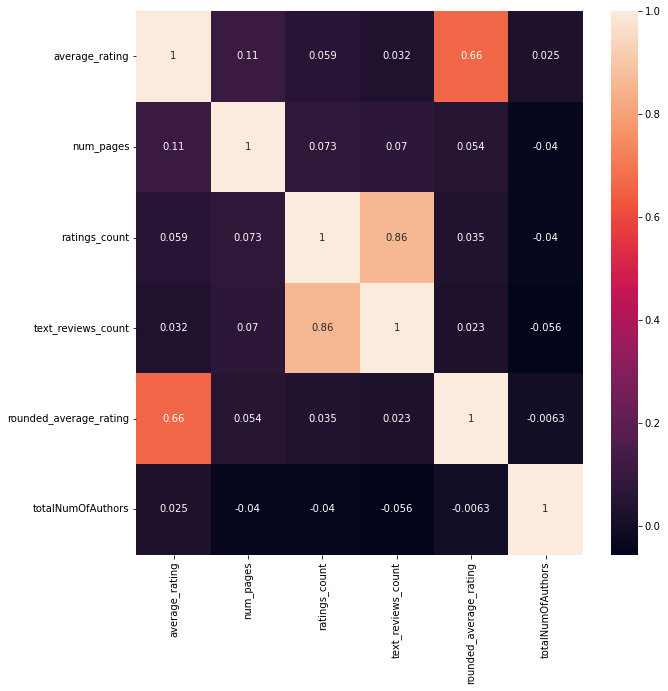

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

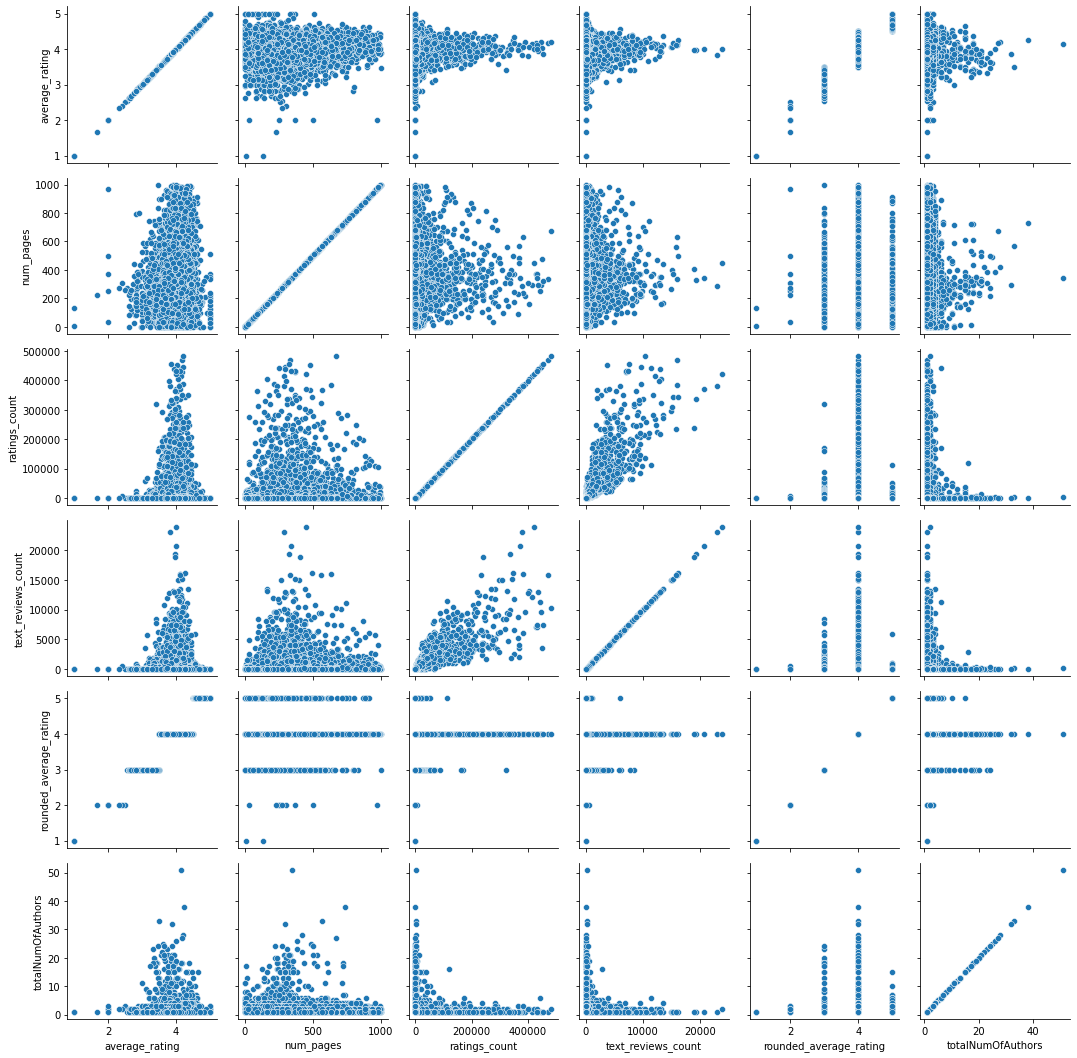

In [38]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

### b- Featuring engineering and selection

##### The features totalNumOfAuthors and rounded_average_ratings doesn't add relevant information, that's why I won't keep them to build the model.

In [39]:
df = df.drop(columns = ['totalNumOfAuthors'])
df = df.drop(columns = ['rounded_average_rating'])

#### text_reviews_count and ratings_count, will create redundancy because they are highly correlated. It is necessary to delete one of them.

In [40]:
df = df.drop(columns = ['text_reviews_count'])

### After cleaning data, we are ready to a dinal check of the dataframe shape and features type.

In [41]:
df.shape

(10761, 6)

In [42]:
df.dtypes

title              object
authors            object
average_rating    float64
num_pages           int64
ratings_count       int64
publisher          object
dtype: object

#### Dataset info:
##### - Number of features = 6
##### - Number of observations = 10761

#### Variables types:
##### - Numerical = 3
##### - Categorical = 3

#### - title: is a unique identifier
#### - author: I kept only the first authors name, to be able to group by it.
#### - publisher: another categorical value, to help to identify patterns.
#### average_rating: it is a continuous variable and the Response variable.
#### num_pages: I converted it into an integer and removed outliers of the upper limit.
#### ratings_count: is an integer feature.

### 5- Data preparation for ML Modeling

#### Label Encoding

In [43]:
ml_df = df

In [44]:
label_encoder = preprocessing.LabelEncoder()

In [45]:
ml_df['title']= label_encoder.fit_transform(ml_df['title'])

In [46]:
ml_df['authors']= label_encoder.fit_transform(ml_df['authors'])

In [47]:
ml_df['publisher']= label_encoder.fit_transform(ml_df['publisher'])
ml_df.head(3)

,title,authors,average_rating,num_pages,ratings_count,publisher
2,2982,1569,4.42,352,6333,1722
5,9422,3990,3.74,152,19,1329
7,8863,967,4.38,815,3628,772


#### Preparing Data

In [48]:
X = ml_df.drop(['average_rating', 'authors'], axis = 1)

In [49]:
y = ml_df.average_rating

##### Standardising the dataset

In [50]:
std = StandardScaler()
X_std = std.fit_transform(X)

##### Spliting the dataset: into training and testing samples

In [51]:
def split(X,y):
    return train_test_split(X_std, y, test_size=0.20, random_state=1)

In [52]:
X_train, X_test, y_train, y_test=split(X,y)
print('Training data as below:')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest data as below:')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Training data as below:
X_train shape:  (8608, 4)
y_train shape:  (8608,)

Test data as below:
X_test shape:  (2153, 4)
y_test shape:  (2153,)


### Model Development and Evaluation

#### A Linear Regression Model will be develop. 
#### Then analyse the results and make observations.
#### Finally, I will do feature selection to see if scores change.

### Linear regression in scikit-learn
##### To apply any machine learning algorithm on your dataset, basically there are 4 steps:

##### Load the algorithm

##### Instantiate and Fit the model to the training dataset

##### Prediction on the test set

##### Calculating Root mean square error

##### Linear regression in scikit-learn
##### To apply any machine learning algorithm on your dataset, basically there are 4 steps:

##### Load the algorithm

##### Instantiate and Fit the model to the training dataset

##### Prediction on the test set

##### Calculating Root mean square error

In [53]:
linreg = LinearRegression()

In [54]:
linreg.fit(X_train, y_train) 

LinearRegression()

In [55]:
print('Intercept:',linreg.intercept_)          
print('Coefficients:',linreg.coef_)  

Intercept: 3.9373559006479346
Coefficients: [0.00779387 0.03177312 0.01528138 0.00844611]


#### Using the Model to make predictions

In [56]:
y_pred_train = linreg.predict(X_train)  

In [57]:
y_pred_test = linreg.predict(X_test)

C:\Users\pinki\anaconda3\envs\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

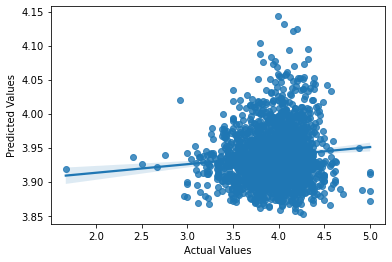

In [58]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

#### Model Evaluation

##### Error is the deviation of the values predicted by the model with the true values.

##### Mean Absolute Error
##### Mean Squared Error
##### Root Mean Squared Error


#### Calculating Mean Absolute Error (MAE)

In [59]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.21971239550184818
MAE for test set is 0.22021928073812702


#### Calculating Root Mean Squared Error (RMSE)

In [60]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.29155473402905324
RMSE for test set is 0.2889260082717667


In [61]:
evaluation = pd.DataFrame({'Actual_Values': y_test.tolist(), 'Predicted_Values': y_pred_test.tolist()}).head(30)
evaluation.head(10)

,Actual_Values,Predicted_Values
0,4.09,3.978674
1,3.70,3.941422
2,3.74,3.916673
3,4.03,3.871130
4,3.80,3.891959
5,4.43,3.893269
6,3.76,3.948373
7,4.00,3.917819
8,3.76,3.961936
9,3.83,3.920708


Text(0.5, 1.0, 'Actual v/s Predicted values Using Linear Regression Model1')

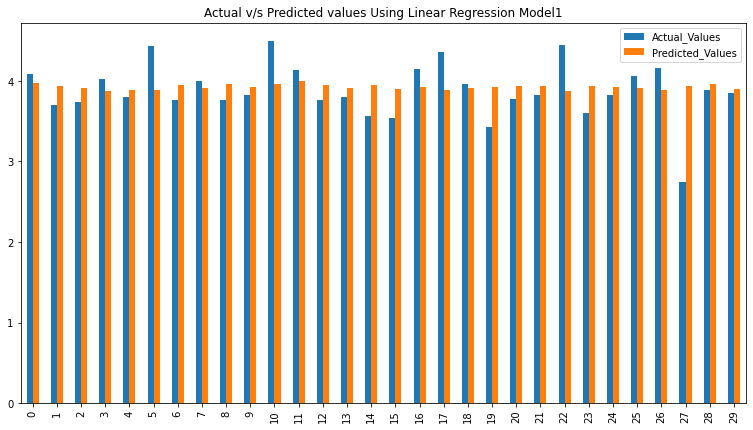

In [62]:
evaluation.plot(kind='bar', figsize=(13, 7))
plt.title("Actual v/s Predicted values Using Linear Regression Model1")

### 2nd Linear Model with feature selection

In [63]:
ml_df.columns

Index(['title', 'authors', 'average_rating', 'num_pages', 'ratings_count',
       'publisher'],
      dtype='object')

In [64]:
X1 = ml_df.loc[:,["title","authors","num_pages","ratings_count", "publisher"]]

In [65]:
y1=ml_df.average_rating

#### Standardising the dataset

In [66]:
std= StandardScaler()
X1_std = std.fit_transform(X1)

In [67]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_std, y1, test_size=0.20, random_state=1)

In [68]:
linreg = LinearRegression()
linreg.fit(X1_train, y1_train) 

LinearRegression()

In [69]:
y1_pred_train = linreg.predict(X1_train)  
y1_pred_test = linreg.predict(X1_test) 

C:\Users\pinki\anaconda3\envs\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

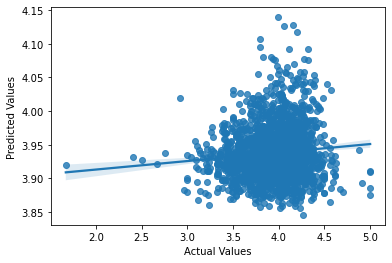

In [70]:
sns.regplot(y1_test,y1_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [71]:
MAE_train1 = metrics.mean_absolute_error(y1_train, y1_pred_train)
MAE_test1 = metrics.mean_absolute_error(y1_test, y1_pred_test)
print('MAE for training set is {}'.format(MAE_train1))
print('MAE for test set is {}'.format(MAE_test1))

MAE for training set is 0.21967908612573436
MAE for test set is 0.2202375891661692


In [72]:
RMSE_train1 = np.sqrt( metrics.mean_squared_error(y1_train, y1_pred_train))
RMSE_test1 = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.29155473402905324
RMSE for test set is 0.2889260082717667


In [73]:
r2_train1 = metrics.r2_score(y1_train,y1_pred_train)
r2_test1 = metrics.r2_score(y1_test,y1_pred_test)
print("R2 score for training set is {}".format(r2_train1))
print("R2 score for test set is {}".format(r2_test1))

R2 score for training set is 0.017074795859578495
R2 score for test set is 0.00803700314257838


#### Check the accuracy of our model to predict values

In [74]:
acc = pd.DataFrame({'Actual_Values': y1_test.tolist(), 'Predicted_Values': y1_pred_test.tolist()}).head(30)
acc.head(10)

,Actual_Values,Predicted_Values
0,4.09,3.976751
1,3.70,3.937226
2,3.74,3.913574
3,4.03,3.877171
4,3.80,3.887017
5,4.43,3.895009
6,3.76,3.947587
7,4.00,3.913815
8,3.76,3.965318
9,3.83,3.924967


Text(0.5, 1.0, 'Actual v/s Predicted values Using Linear Regression model 2')

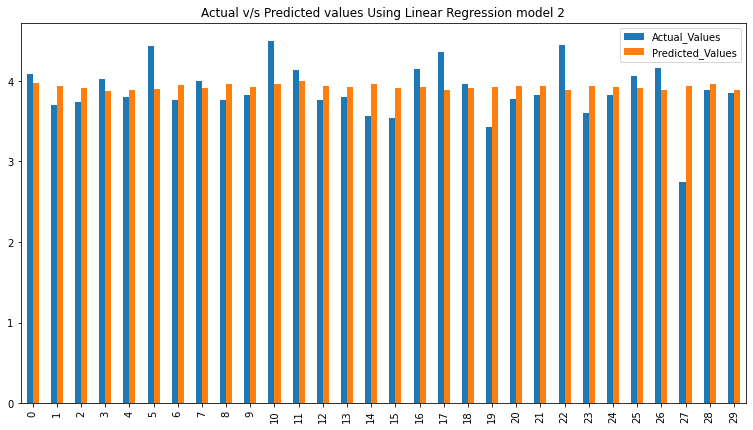

In [75]:
acc.plot(kind='bar', figsize=(13, 7))
plt.title("Actual v/s Predicted values Using Linear Regression model 2")

#### Random Forest Model

In [76]:
regressor= RandomForestRegressor(n_estimators = 20, random_state = 0)

In [77]:
X2=ml_df.loc[:,["title","authors","num_pages","ratings_count","publisher"]]
y2= ml_df.average_rating

In [78]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)

In [79]:
regressor.fit(X2_train,y2_train)

RandomForestRegressor(n_estimators=20, random_state=0)

##### Train data prediction

In [80]:
y_pred_train2 = regressor.predict(X2_train)

##### Test data prediction

In [81]:
y_pred_test2 = regressor.predict(X2_test)

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred_test2))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred_test2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred_test2)))

Mean Absolute Error: 0.2067243381328379
Mean Squared Error: 0.07846799732930793
Root Mean Squared Error: 0.28012139748564


In [83]:
RMSE_train1 = np.sqrt( metrics.mean_squared_error(y2_train, y_pred_train2))
RMSE_test1 = np.sqrt(metrics.mean_squared_error(y2_test, y_pred_test2))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.29155473402905324
RMSE for test set is 0.2889260082717667


In [84]:
accuracy = pd.DataFrame({'Actual_Values': y2_test.tolist(), 'Predicted_Values': y_pred_test2.tolist()}).head(30)
acc.head(10)

,Actual_Values,Predicted_Values
0,4.09,3.976751
1,3.70,3.937226
2,3.74,3.913574
3,4.03,3.877171
4,3.80,3.887017
5,4.43,3.895009
6,3.76,3.947587
7,4.00,3.913815
8,3.76,3.965318
9,3.83,3.924967


Text(0.5, 1.0, 'Actual v/s Predicted values Using Random Forest')

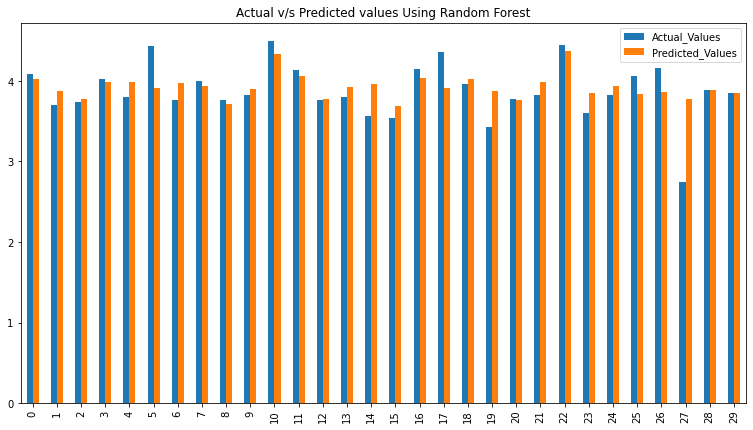

In [85]:
accuracy.plot(kind='bar', figsize=(13, 7))
plt.title("Actual v/s Predicted values Using Random Forest")

### Conclusion
##### We studied in breifly about the data, its characteristics and its distribution.

##### We investigated about the features which to retain and which to discard.

##### With above model testing we can say Linear Regression Model 2 is best model to train data

##### As we can see R2 value is reduces from 0.58 to 0.40 from taining data set to test data set. In this way we can say our Lienear Regression model2 is performing well.
